In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display


In [124]:
blocks = pd.read_csv('BWND YTD/Actuals_YTD_1113.tsv', 
                 sep='\t',
                 parse_dates=['block_start_datetime_utc', 'block_start_datetime_local'],
                 dtype={
                     'warehouse_id': 'category',
                     'promisewindow': 'category',
                     'duration': 'float32',
                     'guaranteed_earnings_price_per_hr': 'float32',
                     'block_length': 'float32',
                     'wave_mins': 'int16',
                     'promisewindownumber': 'int16'
                 })

print(f"✅ Successfully loaded {len(blocks):,} rows × {len(blocks.columns)} columns")
print(f"📊 Memory usage: {blocks.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
blocks.info()


#Hygenie check was just the sum of BWND without any filters is also 120796. 
#We are using the longer version to preserve a lot of details related to the block


✅ Successfully loaded 3,956,176 rows × 20 columns
📊 Memory usage: 1501.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3956176 entries, 0 to 3956175
Data columns (total 20 columns):
 #   Column                                Dtype         
---  ------                                -----         
 0   warehouse_id                          category      
 1   service_area_id                       object        
 2   block_start_datetime_utc              datetime64[ns]
 3   block_start_datetime_local            datetime64[ns]
 4   duration                              float32       
 5   block_length                          float32       
 6   date                                  object        
 7   block_start_wave                      object        
 8   wave_mins                             int16         
 9   wave_temp                             object        
 10  wave                                  object        
 11  promisewindow                         category      

In [125]:
uniquewarehouses = blocks['warehouse_id'].nunique()
uniquewarehouses

123

In [126]:
rlp_blocks = pd.read_csv('BWND YTD/RLP_YTD_1113.tsv', 
                 sep='\t',
                 parse_dates=['block_start_datetime_utc', 'block_start_datetime_local'],
                 dtype={
                     'warehouse_id': 'category',
                     'promisewindow': 'category',
                     'duration': 'float32',
                     'guaranteed_earnings_price_per_hr': 'float32',
                     'block_length': 'float32',
                     'wave_mins': 'int16',
                     'promisewindownumber': 'int16'
                 })

print(f"✅ Successfully loaded {len(rlp_blocks):,} rows × {len(rlp_blocks.columns)} columns")
print(f"📊 Memory usage: {rlp_blocks.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
rlp_blocks.info()



✅ Successfully loaded 465,868 rows × 15 columns
📊 Memory usage: 92.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465868 entries, 0 to 465867
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   warehouse_id                 465868 non-null  category      
 1   service_area_id              465868 non-null  object        
 2   block_start_datetime_utc     465868 non-null  datetime64[ns]
 3   block_start_datetime_local   465868 non-null  datetime64[ns]
 4   duration                     465868 non-null  float32       
 5   block_length                 465868 non-null  float32       
 6   block_start_wave             465868 non-null  object        
 7   wave_mins                    465868 non-null  int16         
 8   promisewindow                465868 non-null  category      
 9   promisewindownumber          465868 non-null  int16         
 10  sum_metric_rlp_adds 

In [127]:
rlpuniquewarehouses = rlp_blocks['warehouse_id'].nunique()
rlpuniquewarehouses

83

In [128]:
identifier_columns = ['warehouse_id', 'service_area_id', 'block_start_datetime_utc',
                     'block_start_datetime_local', 'duration', 'block_length',
                     'block_start_wave', 'wave_mins', 'promisewindow', 'promisewindownumber']


In [129]:
def merge_datasets(rlp_blocks, blocks):
    # Get the columns that are unique to RLP dataset (excluding identifier columns)
    rlp_specific_columns = [col for col in rlp_blocks.columns 
                           if col not in identifier_columns]
    
    # Merge the datasets
    merged_df = pd.merge(
        blocks,
        rlp_blocks[identifier_columns + rlp_specific_columns],
        on=identifier_columns,
        how='left'  # Keep all rows from actuals dataset
    )
    
    # Fill NaN values with 0 for the RLP specific columns
    merged_df[rlp_specific_columns] = merged_df[rlp_specific_columns].fillna(0)
    
    return merged_df

In [130]:
df = merge_datasets(df_rlp, df_actuals)
print("\nMerged Result:")
df


Merged Result:


,warehouse_id,service_area_id,block_start_datetime_utc,block_start_datetime_local,duration,block_length,date,block_start_wave,wave_mins,wave_temp,...,sum_checked_in_blocks,sum_attended_blocks,sum_bwnd_blocks,sum_surged_blocks,sum_extended_blocks,sum_metric_rlp_adds,avg_metric_rlp_adds,max_metric_rlp_adds,min_metric_rlp_adds,avg_max_min_metric_rlp_adds
0,VAH1,cadc3898-fd31-4691-95fe-5d239447c026,2025-09-05 23:30:00,2025-09-05 18:30:00,180.0,3.0,2025-09-05,18:30,30,18:30:00,...,6,6,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,VAX1,4fb289c4-2ce4-4ddd-8bde-078c1dbea774,2025-01-25 20:15:00,2025-01-25 12:15:00,180.0,3.0,2025-01-25,12:15,15,12:15:00,...,2,2,2,0.0,0,0.0,0.0,0.0,0.0,0.0
2,VAX1,4fb289c4-2ce4-4ddd-8bde-078c1dbea774,2025-02-10 14:15:00,2025-02-10 06:15:00,240.0,4.0,2025-02-10,06:15,15,06:15:00,...,2,2,0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,VAX1,4fb289c4-2ce4-4ddd-8bde-078c1dbea774,2025-03-15 16:00:00,2025-03-15 09:00:00,300.0,5.0,2025-03-15,09:00,0,09:00:00,...,8,8,0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,VAX1,4fb289c4-2ce4-4ddd-8bde-078c1dbea774,2025-05-18 13:15:00,2025-05-18 06:15:00,270.0,4.5,2025-05-18,06:15,15,06:15:00,...,8,8,0,0.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956171,VWI1,63a04537-3d1a-4d1f-9057-8375564840b8,2025-07-23 09:30:00,2025-07-23 04:30:00,210.0,3.5,2025-07-23,04:30,30,04:30:00,...,35,35,3,37.0,0,0.0,0.0,0.0,0.0,0.0
3956172,VYS3,5725fe5d-67c9-4e6f-9c99-b050c9bd7062,2025-02-14 14:45:00,2025-02-14 09:45:00,300.0,5.0,2025-02-14,09:45,45,09:45:00,...,5,5,0,2.0,0,0.0,0.0,0.0,0.0,0.0
3956173,VYS3,5725fe5d-67c9-4e6f-9c99-b050c9bd7062,2025-02-22 20:15:00,2025-02-22 15:15:00,240.0,4.0,2025-02-22,15:15,15,15:15:00,...,3,2,1,3.0,0,9.0,1.0,2.0,1.0,1.0
3956174,VYS3,5725fe5d-67c9-4e6f-9c99-b050c9bd7062,2025-05-15 18:30:00,2025-05-15 14:30:00,210.0,3.5,2025-05-15,14:30,30,14:30:00,...,7,7,5,7.0,0,0.0,0.0,0.0,0.0,0.0


In [131]:
df['BWND_happened'] = (df['sum_bwnd_blocks'] > 0).astype(int)

# RLP_happened: 1 if sum_metric_rlp_adds > 0, else 0  
df['RLP_happened'] = (df['sum_metric_rlp_adds'] > 0).astype(int)
df.head()

,warehouse_id,service_area_id,block_start_datetime_utc,block_start_datetime_local,duration,block_length,date,block_start_wave,wave_mins,wave_temp,...,sum_bwnd_blocks,sum_surged_blocks,sum_extended_blocks,sum_metric_rlp_adds,avg_metric_rlp_adds,max_metric_rlp_adds,min_metric_rlp_adds,avg_max_min_metric_rlp_adds,BWND_happened,RLP_happened
0,VAH1,cadc3898-fd31-4691-95fe-5d239447c026,2025-09-05 23:30:00,2025-09-05 18:30:00,180.0,3.0,2025-09-05,18:30,30,18:30:00,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0
1,VAX1,4fb289c4-2ce4-4ddd-8bde-078c1dbea774,2025-01-25 20:15:00,2025-01-25 12:15:00,180.0,3.0,2025-01-25,12:15,15,12:15:00,...,2,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0
2,VAX1,4fb289c4-2ce4-4ddd-8bde-078c1dbea774,2025-02-10 14:15:00,2025-02-10 06:15:00,240.0,4.0,2025-02-10,06:15,15,06:15:00,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0
3,VAX1,4fb289c4-2ce4-4ddd-8bde-078c1dbea774,2025-03-15 16:00:00,2025-03-15 09:00:00,300.0,5.0,2025-03-15,09:00,0,09:00:00,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0
4,VAX1,4fb289c4-2ce4-4ddd-8bde-078c1dbea774,2025-05-18 13:15:00,2025-05-18 06:15:00,270.0,4.5,2025-05-18,06:15,15,06:15:00,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3956176 entries, 0 to 3956175
Data columns (total 27 columns):
 #   Column                                Dtype         
---  ------                                -----         
 0   warehouse_id                          object        
 1   service_area_id                       object        
 2   block_start_datetime_utc              datetime64[ns]
 3   block_start_datetime_local            datetime64[ns]
 4   duration                              float32       
 5   block_length                          float32       
 6   date                                  object        
 7   block_start_wave                      object        
 8   wave_mins                             int16         
 9   wave_temp                             object        
 10  wave                                  object        
 11  promisewindow                         category      
 12  promisewindownumber                   int16         
 13  avg_guarante

## 2. Data Preprocessing

In [133]:
def check_rlp_inconsistencies(df):
    # Filter for rows where RLP_happened = 0
    rlp_zero = df[df['RLP_happened'] == 0]
    
    # List of RLP metric columns to check
    rlp_columns = [
        'sum_metric_rlp_adds',
        'avg_metric_rlp_adds',
        'max_metric_rlp_adds',
        'min_metric_rlp_adds',
        'avg_max_min_metric_rlp_adds'
    ]
    
    # Check for non-zero values in each column
    inconsistencies = {}
    for col in rlp_columns:
        non_zero_count = rlp_zero[rlp_zero[col] != 0].shape[0]
        if non_zero_count > 0:
            inconsistencies[col] = {
                'non_zero_count': non_zero_count,
                'example_values': rlp_zero[rlp_zero[col] != 0][col].head().tolist(),
                'min_value': rlp_zero[rlp_zero[col] != 0][col].min(),
                'max_value': rlp_zero[rlp_zero[col] != 0][col].max()
            }
    
    # Print results
    print(f"Total rows with RLP_happened = 0: {len(rlp_zero)}")
    print("\nInconsistencies found:")
    for col, stats in inconsistencies.items():
        print(f"\n{col}:")
        print(f"Number of non-zero values: {stats['non_zero_count']}")
        print(f"Example values: {stats['example_values']}")
        print(f"Range: {stats['min_value']} to {stats['max_value']}")
    
    # Calculate percentage of inconsistent rows
    total_inconsistent = len(rlp_zero[
        (rlp_zero['sum_metric_rlp_adds'] != 0) |
        (rlp_zero['avg_metric_rlp_adds'] != 0) |
        (rlp_zero['max_metric_rlp_adds'] != 0) |
        (rlp_zero['min_metric_rlp_adds'] != 0) |
        (rlp_zero['avg_max_min_metric_rlp_adds'] != 0)
    ])
    
    print(f"\nPercentage of RLP_happened = 0 rows with inconsistencies: {(total_inconsistent/len(rlp_zero))*100:.2f}%")
    
    return inconsistencies

# Use the function
inconsistencies = check_rlp_inconsistencies(df)

Total rows with RLP_happened = 0: 3488269

Inconsistencies found:

Percentage of RLP_happened = 0 rows with inconsistencies: 0.00%


In [134]:
uniquewarehouses = df['warehouse_id'].nunique()
uniquewarehouses

123

In [135]:
#QC check - Passed

df_filtered = df[(df['block_start_datetime_local'].dt.date >= pd.to_datetime('2025-08-12').date()) & 
                 (df['block_start_datetime_local'].dt.date <= pd.to_datetime('2025-10-12').date())]

total_rlp_blocks_aug_oct = df_filtered[df_filtered['RLP_happened'] == 1]['RLP_happened'].sum()
total_rlp_blocks_aug_oct

np.int64(79369)

In [136]:
#QC check - Passed

df_filtered = df[(df['block_start_datetime_local'].dt.date >= pd.to_datetime('2025-08-12').date()) & 
                 (df['block_start_datetime_local'].dt.date <= pd.to_datetime('2025-10-12').date())]

total_rlp_blocks_aug_oct = df_filtered[df_filtered['RLP_happened'] == 1]['RLP_happened'].sum()
total_rlp_blocks_aug_oct

np.int64(79369)

In [137]:
#QC check - Passed 
df_filtered = df[(df['block_start_datetime_local'].dt.date >= pd.to_datetime('2025-08-12').date()) & 
                 (df['block_start_datetime_local'].dt.date <= pd.to_datetime('2025-10-12').date())]

total_rlp__bwnd_blocks_aug_oct = df_filtered[(df_filtered['BWND_happened'] == 1) & (df_filtered['RLP_happened'] == 1)]['sum_bwnd_blocks'].sum()
total_rlp__bwnd_blocks_aug_oct

np.int64(49174)

In [140]:
#QC check - Passed 
df_filtered = df[(df['block_start_datetime_local'].dt.date >= pd.to_datetime('2025-01-01').date()) & 
                 (df['block_start_datetime_local'].dt.date <= pd.to_datetime('2025-10-30').date())]

total_rlp__bwnd_blocks_aug_oct = df_filtered[(df_filtered['BWND_happened'] == 1) & (df_filtered['RLP_happened'] == 1)]['sum_bwnd_blocks'].sum()
total_rlp__bwnd_blocks_aug_oct

np.int64(291154)

In [138]:
#this shows the total number of RLP blocks 
total_rlp_blocks = df[df['RLP_happened'] == 1]['RLP_happened'].sum()
total_rlp_blocks

np.int64(467907)

In [122]:
total_bwnd_blocks = df[df['BWND_happened'] == 1]['BWND_happened'].sum()
total_bwnd_blocks

np.int64(1340281)

In [141]:
#this shows the total number of BWND blocks 
total_sum_bwnd_blocks = df[df['BWND_happened'] == 1]['sum_bwnd_blocks'].sum()
total_sum_bwnd_blocks

np.int64(4258161)

## 3. Impact Analysis

In [48]:
# Create a proper copy to avoid SettingWithCopyWarning
rlp_bwnd_happened_rows = rlp_bwnd_happened_rows.copy()

# Method 2: Preventable Waste (minimum overlap)
rlp_bwnd_happened_rows['preventable_waste'] = np.minimum(
    rlp_bwnd_happened_rows['sum_bwnd_blocks'], 
    rlp_bwnd_happened_rows['avg_metric_rlp_adds']
)

# Method 5: Total Waste (BWND sum only)
rlp_bwnd_happened_rows['total_waste'] = rlp_bwnd_happened_rows['sum_bwnd_blocks']

# Additional metrics
rlp_bwnd_happened_rows['remaining_idle'] = np.maximum(
    0, 
    rlp_bwnd_happened_rows['sum_bwnd_blocks'] - 
    rlp_bwnd_happened_rows['avg_metric_rlp_adds']
)

rlp_bwnd_happened_rows['waste_severity_pct'] = np.where(
    rlp_bwnd_happened_rows['avg_metric_rlp_adds'] > 0,
    (rlp_bwnd_happened_rows['preventable_waste'] / 
     rlp_bwnd_happened_rows['avg_metric_rlp_adds'] * 100).round(2),
    0
)

rlp_bwnd_happened_rows['cost_impact_preventable_waste'] = (
    rlp_bwnd_happened_rows['preventable_waste'] * 
    rlp_bwnd_happened_rows['guaranteed_earnings_price_per_hr'] * 
    (rlp_bwnd_happened_rows['duration'] / 60)
)

rlp_bwnd_happened_rows['cost_impact_total_waste'] = (
    rlp_bwnd_happened_rows['total_waste'] * 
    rlp_bwnd_happened_rows['guaranteed_earnings_price_per_hr'] * 
    (rlp_bwnd_happened_rows['duration'] / 60)
)

# Calculate totals
totals = {
    'preventable_waste': rlp_bwnd_happened_rows['preventable_waste'].sum(),
    'total_waste': rlp_bwnd_happened_rows['total_waste'].sum(),
    'remaining_idle': rlp_bwnd_happened_rows['remaining_idle'].sum(),
    'cost_impact_preventable_waste': rlp_bwnd_happened_rows['cost_impact_preventable_waste'].sum(),
    'cost_impact_total_waste': rlp_bwnd_happened_rows['cost_impact_total_waste'].sum()
}

for key, value in totals.items():
    print(f"Total {key.replace('_', ' ').title()}: {value}")


Total Preventable Waste: 48899
Total Total Waste: 120796
Total Remaining Idle: 71897
Total Cost Impact Preventable Waste: 3379344.0
Total Cost Impact Total Waste: 8408375.75


In [49]:
rlp_bwnd_happened_rows['cost_impact_remaining_idle'] = rlp_bwnd_happened_rows['remaining_idle'] * rlp_bwnd_happened_rows['guaranteed_earnings_price_per_hr'] * (rlp_bwnd_happened_rows['duration'] / 60)
total_cost_impact_remaining_idle = rlp_bwnd_happened_rows['cost_impact_remaining_idle'].sum()
print(f"Total Cost Impact of Remaining Idle: {total_cost_impact_remaining_idle}")


Total Cost Impact of Remaining Idle: 5029031.75


In [50]:
# Get the block length distribution of BWND blocks
bwnd_block_lengths = rlp_bwnd_happened_rows['duration'].value_counts().sort_index()

print("Block Length Distribution of BWND:")
print(bwnd_block_lengths)


Block Length Distribution of BWND:
duration
60.0      187
90.0      295
120.0    2916
150.0    1691
180.0    4027
210.0    3671
240.0    4691
270.0    3739
300.0    1577
Name: count, dtype: int64


In [51]:
# Create binary flags and filter data
df['RLP_happened'] = (df['sum_metric_rlp_adds'] > 0).astype(int)
df['BWND_happened'] = (df['sum_bwnd_blocks'] > 0).astype(int)
rlp_bwnd_happened_rows = df[(df['RLP_happened'] == 1) & (df['BWND_happened'] == 1)]

# Get the block length distribution and convert to DataFrame
bwnd_block_lengths = rlp_bwnd_happened_rows['duration'].value_counts().sort_index()
duration_table = pd.DataFrame({
    'Duration (minutes)': bwnd_block_lengths.index,
    'Count': bwnd_block_lengths.values,
    'Percentage': (bwnd_block_lengths.values / bwnd_block_lengths.sum() * 100).round(1)
})

print("Block Length Distribution when BWND = 1 and RLP = 1:")
display(duration_table)


Block Length Distribution when BWND = 1 and RLP = 1:


,Duration (minutes),Count,Percentage
0,60.0,187,0.8
1,90.0,295,1.3
2,120.0,2916,12.8
3,150.0,1691,7.4
4,180.0,4027,17.7
5,210.0,3671,16.1
6,240.0,4691,20.6
7,270.0,3739,16.4
8,300.0,1577,6.9


In [52]:
# Get the top 10 warehouses by BWND total sum and RLP avg requests total sum
top_warehouses = rlp_bwnd_happened_rows.groupby('warehouse_id')[['sum_bwnd_blocks', 'avg_metric_rlp_adds']].sum().sort_values('sum_bwnd_blocks', ascending=False).head(10)

print("Top 10 Warehouses by BWND Total Sum and RLP Avg Requests Total Sum:")
print(top_warehouses)


Top 10 Warehouses by BWND Total Sum and RLP Avg Requests Total Sum:
              sum_bwnd_blocks  avg_metric_rlp_adds
warehouse_id                                      
VFL2                     7072                 2757
VFL3                     6529                 2965
VVA2                     5634                 3344
VAZ2                     5605                 3252
VMO1                     4855                 2548
VPA1                     4756                 2056
VFL7                     4532                 2461
VPA4                     3825                 3099
VFL8                     3549                 2734
VNL1                     3309                 1004


/var/folders/2m/19c_2dx16ls0zf6dhxppzqsm0000gq/T/ipykernel_99057/3030853742.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_warehouses = rlp_bwnd_happened_rows.groupby('warehouse_id')[['sum_bwnd_blocks', 'avg_metric_rlp_adds']].sum().sort_values('sum_bwnd_blocks', ascending=False).head(10)


/var/folders/2m/19c_2dx16ls0zf6dhxppzqsm0000gq/T/ipykernel_99057/3518113285.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_warehouses = rlp_bwnd_happened_rows.groupby('warehouse_id')[['sum_bwnd_blocks', 'avg_metric_rlp_adds']].sum().sort_values('sum_bwnd_blocks', ascending=False).head(10)


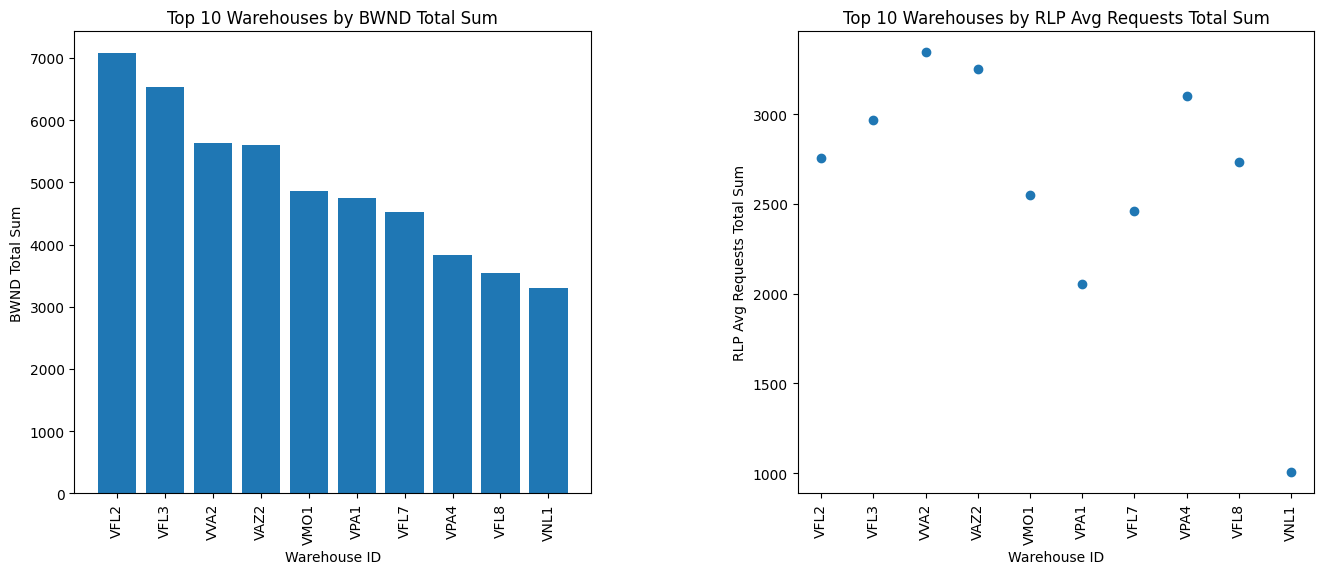

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 warehouses by BWND total sum and RLP avg requests total sum
top_warehouses = rlp_bwnd_happened_rows.groupby('warehouse_id')[['sum_bwnd_blocks', 'avg_metric_rlp_adds']].sum().sort_values('sum_bwnd_blocks', ascending=False).head(10)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart for BWND total sum
ax1.bar(top_warehouses.index, top_warehouses['sum_bwnd_blocks'])
ax1.set_title('Top 10 Warehouses by BWND Total Sum')
ax1.set_xlabel('Warehouse ID')
ax1.set_ylabel('BWND Total Sum')
ax1.tick_params(axis='x', rotation=90)

# Scatter plot for RLP avg requests total sum
ax2.scatter(top_warehouses.index, top_warehouses['avg_metric_rlp_adds'])
ax2.set_title('Top 10 Warehouses by RLP Avg Requests Total Sum')
ax2.set_xlabel('Warehouse ID')
ax2.set_ylabel('RLP Avg Requests Total Sum')
ax2.tick_params(axis='x', rotation=90)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

plt.show()


/var/folders/2m/19c_2dx16ls0zf6dhxppzqsm0000gq/T/ipykernel_99057/384371918.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_warehouses = rlp_bwnd_happened_rows.groupby('warehouse_id')[['sum_bwnd_blocks', 'avg_metric_rlp_adds']].sum().sort_values('sum_bwnd_blocks', ascending=False).head(10)
/var/folders/2m/19c_2dx16ls0zf6dhxppzqsm0000gq/T/ipykernel_99057/384371918.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(bwnd_bar.get_x() - 0.1, bwnd_bar.get_height() + 0.05, f"{top_warehouses['sum_bwnd_blocks'][i]/1e3:.0f}K", ha='center')
/var/folders/2m/19c_2dx16ls0zf6dhxppzqsm0000gq/T/ipykernel_99057/38

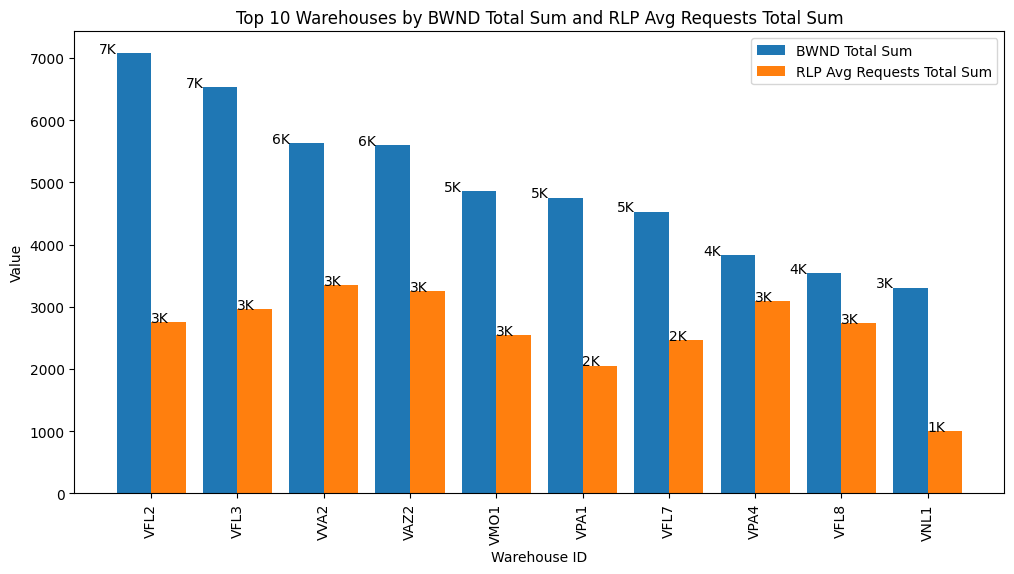

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the top 10 warehouses by BWND total sum and RLP avg requests total sum
top_warehouses = rlp_bwnd_happened_rows.groupby('warehouse_id')[['sum_bwnd_blocks', 'avg_metric_rlp_adds']].sum().sort_values('sum_bwnd_blocks', ascending=False).head(10)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Set width of the bars
bar_width = 0.4

# Position of the bars on the x-axis
x = np.arange(len(top_warehouses.index))

# Plot the BWND total sum
bwnd_bars = ax.bar(x - bar_width/2, top_warehouses['sum_bwnd_blocks'], width=bar_width, label='BWND Total Sum')
rlp_bars = ax.bar(x + bar_width/2, top_warehouses['avg_metric_rlp_adds'], width=bar_width, label='RLP Avg Requests Total Sum')

# Add value labels on top of the bars
for i, (bwnd_bar, rlp_bar) in enumerate(zip(bwnd_bars, rlp_bars)):
    ax.text(bwnd_bar.get_x() - 0.1, bwnd_bar.get_height() + 0.05, f"{top_warehouses['sum_bwnd_blocks'][i]/1e3:.0f}K", ha='center')
    ax.text(rlp_bar.get_x() + 0.1, rlp_bar.get_height() + 0.05, f"{top_warehouses['avg_metric_rlp_adds'][i]/1e3:.0f}K", ha='center')

# Add labels and title
ax.set_title('Top 10 Warehouses by BWND Total Sum and RLP Avg Requests Total Sum')
ax.set_xlabel('Warehouse ID')
ax.set_ylabel('Value')
ax.set_xticks(x)
ax.set_xticklabels(top_warehouses.index, rotation=90)
ax.legend()

plt.show()


/var/folders/2m/19c_2dx16ls0zf6dhxppzqsm0000gq/T/ipykernel_99057/3558631542.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_warehouses = rlp_bwnd_happened_rows.groupby('warehouse_id')[['sum_bwnd_blocks', 'avg_max_min_metric_rlp_adds']].sum().sort_values('sum_bwnd_blocks', ascending=False).head(10)
/var/folders/2m/19c_2dx16ls0zf6dhxppzqsm0000gq/T/ipykernel_99057/3558631542.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(bwnd_bar.get_x() - 0.1, bwnd_bar.get_height() + 0.05, f"{top_warehouses['sum_bwnd_blocks'][i]/1e3:.0f}K", ha='center')
/var/folders/2m/19c_2dx16ls0zf6dhxppzqsm0000gq/T/ipykerne

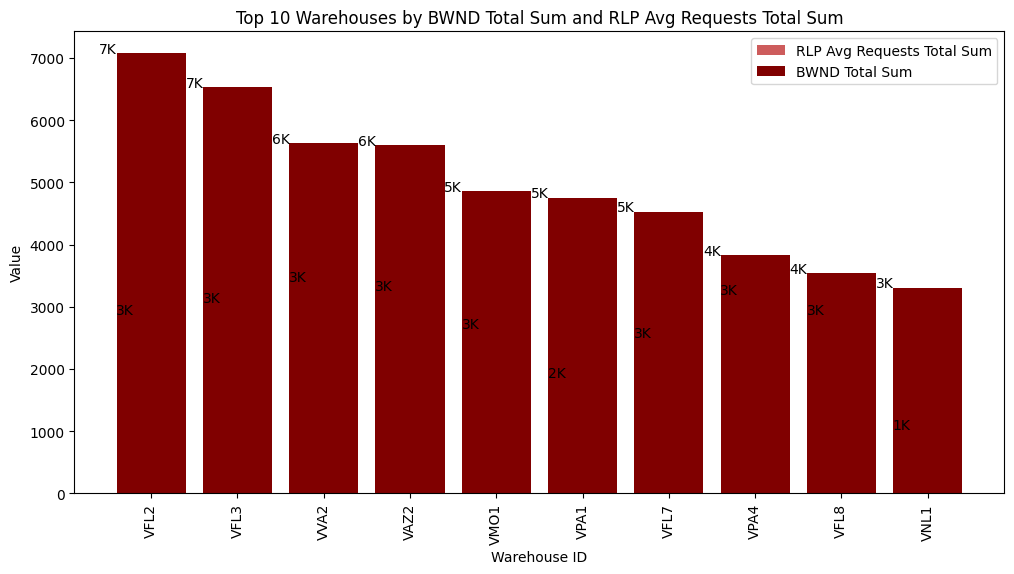

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the top 10 warehouses by BWND total sum and RLP avg requests total sum
top_warehouses = rlp_bwnd_happened_rows.groupby('warehouse_id')[['sum_bwnd_blocks', 'avg_max_min_metric_rlp_adds']].sum().sort_values('sum_bwnd_blocks', ascending=False).head(10)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Set width of the bars
bar_width = 0.8

# Position of the bars on the x-axis
x = np.arange(len(top_warehouses.index))

# Plot the RLP avg requests total sum inside the BWND bars
rlp_bars = ax.bar(x, top_warehouses['avg_max_min_metric_rlp_adds'], width=bar_width, color='indianred', label='RLP Avg Requests Total Sum')

# Plot the BWND total sum
bwnd_bars = ax.bar(x, top_warehouses['sum_bwnd_blocks'], width=bar_width, color='maroon', label='BWND Total Sum')


# Add value labels on top of the bars
for i, (bwnd_bar, rlp_bar) in enumerate(zip(bwnd_bars, rlp_bars)):
    ax.text(bwnd_bar.get_x() - 0.1, bwnd_bar.get_height() + 0.05, f"{top_warehouses['sum_bwnd_blocks'][i]/1e3:.0f}K", ha='center')
    ax.text(rlp_bar.get_x() + 0.1, rlp_bar.get_height() + 0.05, f"{top_warehouses['avg_max_min_metric_rlp_adds'][i]/1e3:.0f}K", ha='center')

# Add labels and title
ax.set_title('Top 10 Warehouses by BWND Total Sum and RLP Avg Requests Total Sum')
ax.set_xlabel('Warehouse ID')
ax.set_ylabel('Value')
ax.set_xticks(x)
ax.set_xticklabels(top_warehouses.index, rotation=90)
ax.legend()

plt.show()


## 4. Unmatched Routes Analysis

In [56]:
# Filter for unmatched routes
unmatched_df = df[df['matching'] == 'unmatched'].copy()

# Dataset 1: Basic unmatched summary
dataset_1 = unmatched_df.groupby([
    'station_code', 
    'promise_window', 
    'route_stage_wave_time',
    'route_length_category'
]).size().reset_index(name='unmatched_routes')

print("Unmatched Routes Summary:")
print(f"Shape: {dataset_1.shape}")
print(dataset_1.head())

# Dataset 2: With closure reason
dataset_2 = unmatched_df.groupby([
    'station_code',
    'promise_window',
    'route_stage_wave_time',
    'route_length_category',
    'da_route_closure_reason'
]).size().reset_index(name='unmatched_routes')

print(f"\nWith closure reasons - Shape: {dataset_2.shape}")
print(dataset_2.head())

KeyError: 'matching'

## 5. Key Visualizations

In [ ]:
# 1. Unmatched Rate Heatmap by Station and Promise Window
match_rate = df.groupby(['station_code', 'promise_window']).agg({
    'planned_route_id': 'count',
    'matching': lambda x: (x == 'unmatched').sum()
}).reset_index()
match_rate['unmatch_rate_%'] = (match_rate['matching'] / match_rate['planned_route_id'] * 100).round(1)

pivot_match = match_rate.pivot(index='promise_window', columns='station_code', values='unmatch_rate_%')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_match, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            vmin=0, vmax=100, cbar_kws={'label': 'Unmatched Rate %'},
            linewidths=0.5, linecolor='gray')
plt.title('Unmatched Route Rate by Station and Promise Window', fontsize=14, fontweight='bold')
plt.xlabel('Station Code', fontsize=12)
plt.ylabel('Promise Window', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# 2. Routes by Station and Route Length Category
route_length = df.groupby(['station_code', 'route_length_category']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
sns.heatmap(route_length, annot=True, fmt='d', cmap='Blues', 
            cbar_kws={'label': 'Number of Routes'},
            linewidths=0.5, linecolor='white')
plt.title('All Routes: Station × Route Length Category', fontsize=14, fontweight='bold')
plt.xlabel('Route Length Category', fontsize=12)
plt.ylabel('Station Code', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# 3. Time-based Analysis
unmatched_df['stage_wave'] = unmatched_df['route_stage_wave_time'].dt.strftime('%H:%M')
time_station = unmatched_df.groupby(['stage_wave', 'station_code']).size().unstack(fill_value=0)

plt.figure(figsize=(16, 8))
sns.heatmap(time_station, cmap='YlOrRd', annot=True, fmt='d',
            cbar_kws={'label': 'Unmatched Routes'},
            linewidths=0.3, linecolor='lightgray')
plt.title('Unmatched Routes by Time Wave and Station', fontsize=14, fontweight='bold')
plt.xlabel('Station Code', fontsize=12)
plt.ylabel('Stage Wave Time (15-min intervals)', fontsize=12)
plt.tight_layout()
plt.show()

## 6. Summary Statistics

In [ ]:
# Key insights summary
print("=== ROUTES ANALYSIS SUMMARY ===")
print(f"Total Routes: {len(df):,}")
print(f"Matched Routes: {(df['matching'] == 'matched').sum():,}")
print(f"Unmatched Routes: {(df['matching'] == 'unmatched').sum():,}")
print(f"Overall Match Rate: {(df['matching'] == 'matched').mean() * 100:.2f}%")

print("\n=== BY STATION ===")
station_summary = df.groupby('station_code')['matching'].agg(['count', lambda x: (x == 'matched').mean() * 100]).round(2)
station_summary.columns = ['Total_Routes', 'Match_Rate_%']
print(station_summary.sort_values('Match_Rate_%'))

print("\n=== BY PROMISE WINDOW ===")
window_summary = df.groupby('promise_window')['matching'].agg(['count', lambda x: (x == 'matched').mean() * 100]).round(2)
window_summary.columns = ['Total_Routes', 'Match_Rate_%']
print(window_summary.sort_values('Match_Rate_%'))